In [8]:
from textstat.textstat import textstat

In [5]:
import os
import json

def get_data(folder_name):
    x = []
    y = []
    positions = []
    file_names = []

    for file in os.listdir(folder_name):
        if file.endswith(".txt"):
            file_name = os.path.join(folder_name, file[:-4])

            file_text = open(file_name + '.txt', encoding='utf8')
            try:
                file_truth = open(file_name + '.truth', encoding='utf8')

                try:
                    text = file_text.read()
                    truth = json.load(file_truth)
                    truth_changes = truth['changes']
                    truth_positions = truth['positions']

                    x.append(text)
                    y.append(truth_changes)
                    positions.append(truth_positions)
                    file_names.append(file[:-4])
                finally:
                    file_truth.close()
            finally:
                file_text.close()

    return x, y, positions, file_names

In [6]:
import pandas as pd
from nltk.tokenize import sent_tokenize

TRAINING_DIR = '../data/training'

X, y, positions, file_names = get_data(
    TRAINING_DIR)
df = pd.DataFrame(data={'text': X, 'label': y, 'filename': file_names, 'pos':positions})
df['num_sent'] = [len(sent_tokenize(d)) for d in df.text]
df['num_splits'] = [len(x) for x in df.pos]

In [6]:
df.head()

,filename,label,pos,text,num_sent,num_splits
0,problem-1410,True,"[1683, 2890]",Make up some more tasks and add them to the qu...,32,2
1,problem-2252,False,[],"Yes, there were extensive rapes by American so...",44,0
2,problem-184,False,[],Observers highlight key things that are occurr...,27,0
3,problem-42,False,[],TL;DR Much of Scrum's value to an organization...,38,0
4,problem-2814,False,[],Origen believed (Contra Celsum 8) that while C...,29,0


In [3]:
test_data = """Playing games has always been thought to be important to the development of well-balanced and creative children; however, what part, if any, they should play in the lives of adults has never been researched that deeply. I believe that playing games is every bit as important for adults as for children. Not only is taking time out to play games with our children and other adults valuable to building interpersonal relationships but is also a wonderful way to release built up tension."""

print(textstat.flesch_reading_ease(test_data))
print(textstat.smog_index(test_data))
print(textstat.flesch_kincaid_grade(test_data))
print(textstat.coleman_liau_index(test_data))
print(textstat.automated_readability_index(test_data))
print(textstat.dale_chall_readability_score(test_data))
print(textstat.difficult_words(test_data))
print(textstat.linsear_write_formula(test_data))
print(textstat.gunning_fog(test_data))
print(textstat.text_standard(test_data))

52.23
12.5
12.8
11.61
15.5
7.49
13
13.833333333333334
19.26146341463415
12th and 13th grade


In [8]:
getattr(textstat, 'flesch_reading_ease')(test_data)

52.23

In [17]:
names = ['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index', \
         'automated_readability_index', 'dale_chall_readability_score', 'difficult_words', \
         'linsear_write_formula', 'gunning_fog']

In [18]:
for name in names:
    df[name] = [getattr(textstat, name)(d) for d in df.text]

In [19]:
df.head()

,filename,label,pos,text,num_sent,num_splits,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog,text_standard
0,problem-1410,True,"[1683, 2890]",Make up some more tasks and add them to the qu...,32,2,69.01,10.7,8.4,9.92,10.2,7.86,139,5.857143,17.950912,7th and 8th grade
1,problem-2252,False,[],"Yes, there were extensive rapes by American so...",44,0,53.51,12.8,10.2,13.11,12.4,8.86,200,5.187500,20.084127,12th and 13th grade
2,problem-184,False,[],Observers highlight key things that are occurr...,27,0,80.01,8.6,6.2,7.60,7.3,6.82,67,5.714286,14.608820,6th and 7th grade
3,problem-42,False,[],TL;DR Much of Scrum's value to an organization...,38,0,57.10,13.6,10.9,12.54,13.8,8.33,199,12.875000,20.055745,12th and 13th grade
4,problem-2814,False,[],Origen believed (Contra Celsum 8) that while C...,29,0,51.38,13.5,11.0,13.87,13.7,9.32,147,9.000000,21.822834,13th and 14th grade


<Figure size 432x288 with 0 Axes>

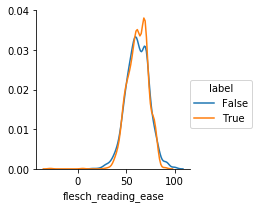

<Figure size 432x288 with 0 Axes>

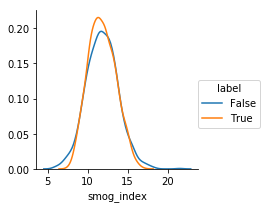

<Figure size 432x288 with 0 Axes>

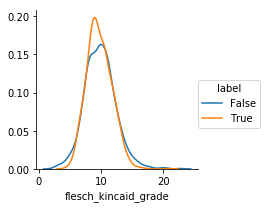

<Figure size 432x288 with 0 Axes>

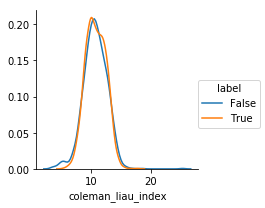

<Figure size 432x288 with 0 Axes>

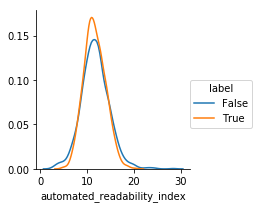

<Figure size 432x288 with 0 Axes>

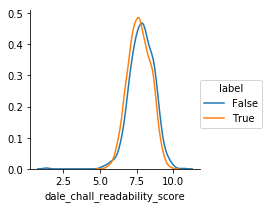

<Figure size 432x288 with 0 Axes>

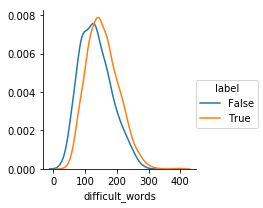

<Figure size 432x288 with 0 Axes>

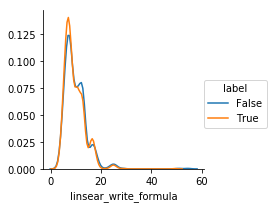

<Figure size 432x288 with 0 Axes>

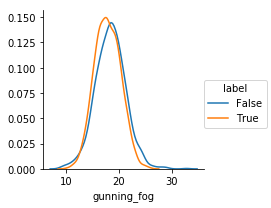

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
for name in names:
    plt.figure()
    sns.FacetGrid(df, hue="label") \
       .map(sns.kdeplot, name) \
       .add_legend()

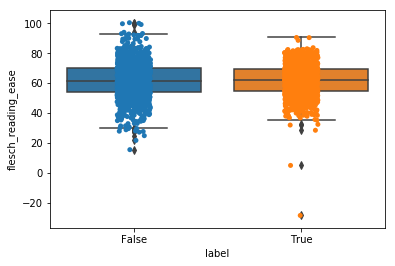

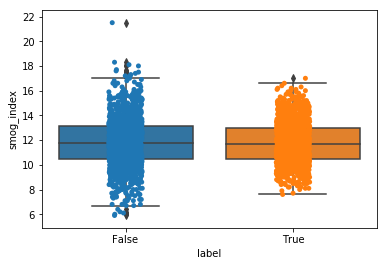

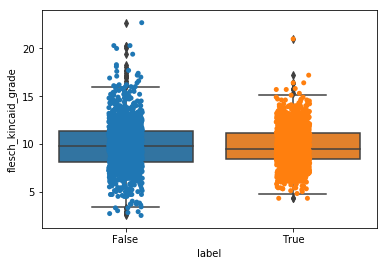

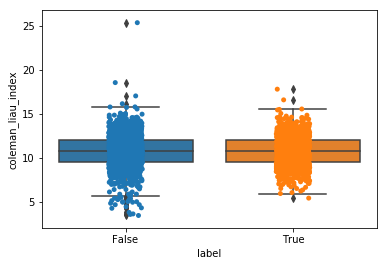

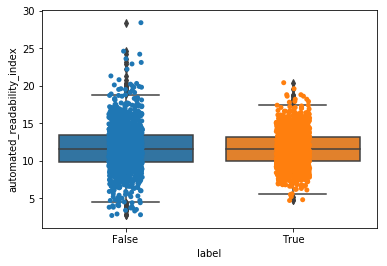

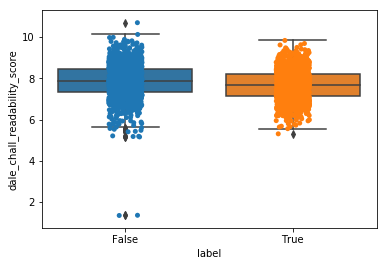

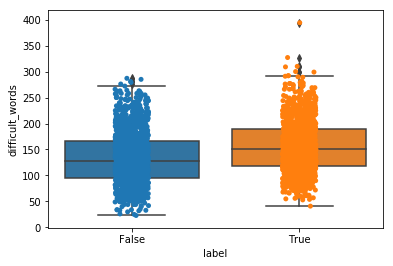

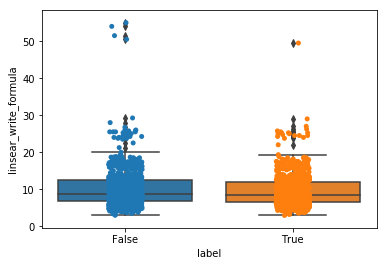

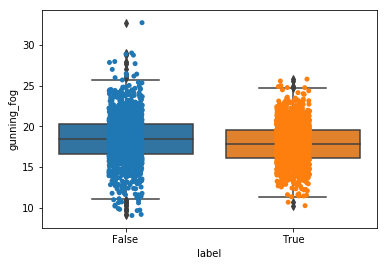

In [21]:
for name in names:
    plt.figure()
    sns.boxplot(x="label", y=name, data=df)
    sns.stripplot(x="label", y=name, data=df, jitter=True, edgecolor="gray")

In [1]:
from nltk.tokenize import word_tokenize
import numpy as np
import math

def word_chunks(X, n=100, chunks=None, wordFilter=None):
    print('Word chunks...')
    return np.array([get_segments_merge_last(text, n, chunks, wordFilter) for text in X])

def get_segments_merge_last(text, n, chunks, wordFilter=None):
    segments = []
    words = word_tokenize(text)
    x = len(words)
    if chunks:
        n = round(x / chunks)
    n = min(n, x)
    i = 0
    for i in range(0, x-x%n-n, n):
        segments.append(' '.join(words[i:i+n]))
    segments.append(' '.join(words[i+n:]))
    if wordFilter:
        segments = [wordFilter(s) for s in segments]
    return segments



In [18]:
def readability(X, feature_names=[]):
    print('Readability features...')

    names = ['flesch_reading_ease', 'smog_index', 'flesch_kincaid_grade', 'coleman_liau_index', \
         'automated_readability_index', 'dale_chall_readability_score', 'difficult_words', \
         'linsear_write_formula', 'gunning_fog']

    #names = ['flesch_reading_ease', 'smog_index', 'difficult_words']
    
    transformed = []

    for doc in X:
        segments = []

        for entry in doc:
            segments.append([getattr(textstat, name)(entry) for name in names])

        transformed.append(segments)

    feature_names.extend(names)
    
    return transformed

In [3]:
def stdev(X):
    print('Stdev...')
    return [np.std(vect, axis=0) for vect in X]

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl

from sklearn.preprocessing import MinMaxScaler

feature_names = []
scaler = MinMaxScaler()
    
readability_features = scaler.fit_transform(stdev(readability(word_chunks(X, n=300), feature_names)))    

Word chunks...
Readability features...
Stdev...


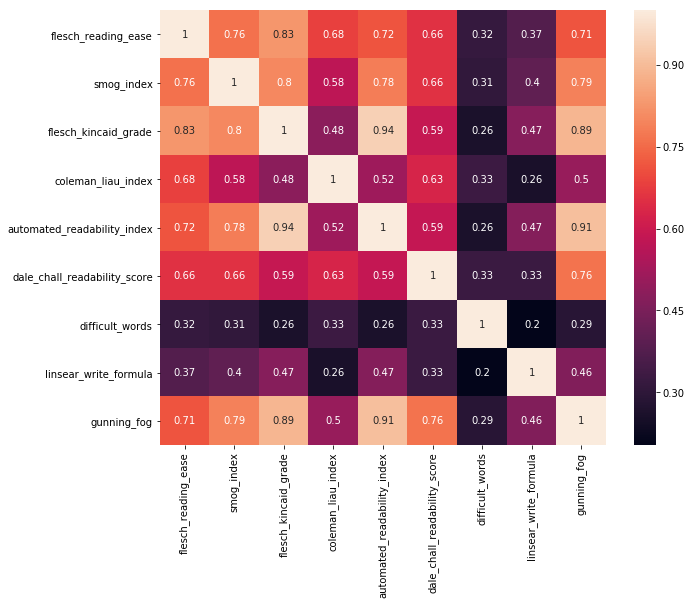

In [21]:
df = pd.DataFrame(readability_features, columns=feature_names)
corr = df.corr()
f, ax = pl.subplots(figsize=(10, 8))
sns.heatmap(corr,  ax=ax, annot=True)

In [22]:
corr

,flesch_reading_ease,smog_index,flesch_kincaid_grade,coleman_liau_index,automated_readability_index,dale_chall_readability_score,difficult_words,linsear_write_formula,gunning_fog
flesch_reading_ease,1.000000,0.762078,0.826298,0.684389,0.716611,0.655998,0.316480,0.374478,0.714961
smog_index,0.762078,1.000000,0.802559,0.576447,0.783709,0.655179,0.307955,0.399362,0.790418
flesch_kincaid_grade,0.826298,0.802559,1.000000,0.482340,0.942285,0.590423,0.259442,0.471515,0.888299
coleman_liau_index,0.684389,0.576447,0.482340,1.000000,0.516312,0.628887,0.327836,0.256856,0.502671
automated_readability_index,0.716611,0.783709,0.942285,0.516312,1.000000,0.587622,0.260815,0.469099,0.907440
dale_chall_readability_score,0.655998,0.655179,0.590423,0.628887,0.587622,1.000000,0.326441,0.326509,0.763684
difficult_words,0.316480,0.307955,0.259442,0.327836,0.260815,0.326441,1.000000,0.203021,0.289182
linsear_write_formula,0.374478,0.399362,0.471515,0.256856,0.469099,0.326509,0.203021,1.000000,0.463210
gunning_fog,0.714961,0.790418,0.888299,0.502671,0.907440,0.763684,0.289182,0.463210,1.000000
